# Installation

In [ ]:
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.7 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

# 7. Convolution Neural Networks

## 7.1. From Fully Connected Layers to Convolutions

###7.1.1. Invariance

###7.1.2. Constraining the MLP

$$\begin{aligned} \left[\mathbf{H}\right]_{i, j} &= [\mathbf{U}]_{i, j} + \sum_k \sum_l[\mathsf{W}]_{i, j, k, l}  [\mathbf{X}]_{k, l}\\ &=  [\mathbf{U}]_{i, j} +
\sum_a \sum_b [\mathsf{V}]_{i, j, a, b}  [\mathbf{X}]_{i+a, j+b}.\end{aligned}$$

####7.1.2.1. Translation Invariance

$$[\mathbf{H}]_{i, j} = u + \sum_a\sum_b [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}.$$


####7.1.2.2. Locality

$$[\mathbf{H}]_{i, j} = u + \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}.$$

###7.1.3. Convolutions

$$(f * g)(\mathbf{x}) = \int f(\mathbf{z}) g(\mathbf{x}-\mathbf{z}) d\mathbf{z}.$$

$$(f * g)(i) = \sum_a f(a) g(i-a).$$


$$(f * g)(i, j) = \sum_a\sum_b f(a, b) g(i-a, j-b).$$

###7.1.4. Channels

$$[\mathsf{H}]_{i,j,d} = \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} \sum_c [\mathsf{V}]_{a, b, c, d} [\mathsf{X}]_{i+a, j+b, c},$$

###7.1.5. Exercises & Discussion

1. Why might translation invariance not be a good idea after all? Give an example.

translation invariance는 동일한 대상이 위치와 무관하게 항상 비슷한 특징을 유지하도록 설계된 특성이다. 즉, 어떤 패턴이 이미지 내 어디에 위치하든 간에 동일한 방식으로 처리된다. 이는 객체의 고유성을 인식하고 위치에 의존하지 않는 일관된 판단을 내릴 수 있게 해주는 좋은 방법론이다.
그러나, 위치나 주변 환경에 따라 대상의 의미가 달라지는 경우에는 평행 이동 불변성이 오히려 부적합할 수 있다. 예를 들어, 예를 들어 salt & pepper 노이즈의 경우, 이미지 전반에 흩어진 검은색과 흰색 픽셀은 노이즈로 간주된다. 하지만, 만약 흰색 픽셀이 우유가 담긴 컵 내부에 위치 한다면 이는 노이즈로 취급되어서는 안되는 것과 같다.


## 7.2. Convolutions for Images

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

###7.2.1. The Cross-Correlation Operation

$$(n_\textrm{h}-k_\textrm{h}+1) \times (n_\textrm{w}-k_\textrm{w}+1).$$


In [ ]:
def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [ ]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

###7.2.2.Convolutional Layers

In [ ]:
class Conv2D(nn.Module):
  def __init__(self, kernel_size):
    super().__init___()
    self.weight = nn.Parameter(torch.rand(kernel_Size))
    sel.bias = nn.Parameter(torch.zeors(1))

  def forward(self, x):
    return corr2d(x, self.weight) + self.bias

###7.2.3. Object Edge Detection in Images

In [ ]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [ ]:
K = torch.tensor([[1.0, -1.0]])
K

tensor([[ 1., -1.]])

In [ ]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [ ]:
corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

###7.2.4. Learning a Kernel

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # Learning rate

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')

epoch 2, loss 0.858
epoch 4, loss 0.167
epoch 6, loss 0.037
epoch 8, loss 0.010
epoch 10, loss 0.003


In [ ]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9901, -1.0008]])

###7.2.5. Exercises & Discussion

In [ ]:
XX = torch.arange(48, dtype=torch.float32).reshape((1, 1, 6, 8))
XX

tensor([[[[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11., 12., 13., 14., 15.],
          [16., 17., 18., 19., 20., 21., 22., 23.],
          [24., 25., 26., 27., 28., 29., 30., 31.],
          [32., 33., 34., 35., 36., 37., 38., 39.],
          [40., 41., 42., 43., 44., 45., 46., 47.]]]])

In [ ]:
# blur_kenel with padding
blur_kernel = torch.tensor([[1.0, 1.0, 1.0],
                            [1.0, 1.0, 1.0],
                            [1.0, 1.0, 1.0]]) / 9.0

conv_blur = nn.Conv2d(1, 1, kernel_size=(3, 3), padding=1, bias=False)
conv_blur.weight.data = blur_kernel.reshape((1, 1, 3, 3))  # 출력, 입력, 높이, 너비
Y_blur = conv_blur(XX)

print(f"Original XX:\n{XX[0, 0]}")
print(f"Blurred XX:\n{Y_blur[0, 0]}")

Original XX:
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20., 21., 22., 23.],
        [24., 25., 26., 27., 28., 29., 30., 31.],
        [32., 33., 34., 35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44., 45., 46., 47.]])
Blurred XX:
tensor([[ 2.0000,  3.3333,  4.0000,  4.6667,  5.3333,  6.0000,  6.6667,  4.6667],
        [ 5.6667,  9.0000, 10.0000, 11.0000, 12.0000, 13.0000, 14.0000,  9.6667],
        [11.0000, 17.0000, 18.0000, 19.0000, 20.0000, 21.0000, 22.0000, 15.0000],
        [16.3333, 25.0000, 26.0000, 27.0000, 28.0000, 29.0000, 30.0000, 20.3333],
        [21.6667, 33.0000, 34.0000, 35.0000, 36.0000, 37.0000, 38.0000, 25.6667],
        [16.2222, 24.6667, 25.3333, 26.0000, 26.6667, 27.3333, 28.0000, 18.8889]],
       grad_fn=<SelectBackward0>)


In [ ]:
# blur_kenel without padding
conv_blur2 = nn.Conv2d(1, 1, kernel_size=(3, 3), padding=0, bias=False)
conv_blur.weight.data = blur_kernel.reshape((1, 1, 3, 3))  # 출력, 입력, 높이, 너비
Y_blur2 = conv_blur2(XX)

print(f"Original XX:\n{XX[0, 0]}")
print(f"Blurred XX:\n{Y_blur2[0, 0]}")

Original XX:
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20., 21., 22., 23.],
        [24., 25., 26., 27., 28., 29., 30., 31.],
        [32., 33., 34., 35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44., 45., 46., 47.]])
Blurred XX:
tensor([[ -2.4661,  -2.9893,  -3.5124,  -4.0355,  -4.5587,  -5.0818],
        [ -6.6512,  -7.1743,  -7.6974,  -8.2206,  -8.7437,  -9.2668],
        [-10.8362, -11.3593, -11.8825, -12.4056, -12.9287, -13.4518],
        [-15.0212, -15.5443, -16.0675, -16.5906, -17.1137, -17.6369]],
       grad_fn=<SelectBackward0>)


In [ ]:
# sharpening_kenel with padding
sharpen_kernel = torch.tensor([[0.0, -1.0, 0.0],
                               [-1.0, 5.0, -1.0],
                               [0.0, -1.0, 0.0]])

conv_sharpen = nn.Conv2d(1, 1, kernel_size=(3, 3), padding=1, bias=False)

conv_sharpen.weight.data = sharpen_kernel.reshape((1, 1, 3, 3)) # 출력, 입력, 높이, 너비

Y_sharpen = conv_sharpen(XX)

print(f"Original XX:\n{X[0, 0]}")
print(f"Sharpened XX:\n{Y_sharpen[0, 0]}")

Original XX:
tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
Sharpened XX:
tensor([[ -9.,  -6.,  -4.,  -2.,   0.,   2.,   4.,  14.],
        [ 15.,   9.,  10.,  11.,  12.,  13.,  14.,  31.],
        [ 31.,  17.,  18.,  19.,  20.,  21.,  22.,  47.],
        [ 47.,  25.,  26.,  27.,  28.,  29.,  30.,  63.],
        [ 63.,  33.,  34.,  35.,  36.,  37.,  38.,  79.],
        [127.,  90.,  92.,  94.,  96.,  98., 100., 150.]],
       grad_fn=<SelectBackward0>)


In [ ]:
# sharpening_kenel without padding
sharpen_kernel = torch.tensor([[0.0, -1.0, 0.0],
                               [-1.0, 5.0, -1.0],
                               [0.0, -1.0, 0.0]])

conv_sharpen2 = nn.Conv2d(1, 1, kernel_size=(3, 3), padding=0, bias=False)

conv_sharpen.weight.data = sharpen_kernel.reshape((1, 1, 3, 3)) # 출력, 입력, 높이, 너비

Y_sharpen2 = conv_sharpen2(XX)

print(f"Original XX:\n{XX[0, 0]}")
print(f"Sharpened XX:\n{Y_sharpen2[0, 0]}")

Original XX:
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20., 21., 22., 23.],
        [24., 25., 26., 27., 28., 29., 30., 31.],
        [32., 33., 34., 35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44., 45., 46., 47.]])
Sharpened XX:
tensor([[2.2773, 2.5347, 2.7921, 3.0494, 3.3068, 3.5642],
        [4.3363, 4.5936, 4.8510, 5.1084, 5.3657, 5.6231],
        [6.3952, 6.6526, 6.9100, 7.1673, 7.4247, 7.6821],
        [8.4542, 8.7115, 8.9689, 9.2263, 9.4836, 9.7410]],
       grad_fn=<SelectBackward0>)


In [ ]:
XX = torch.arange(48, dtype=torch.float32).reshape((1, 1, 6, 8))
Y_blur = conv_blur(XX)
Y_sharpen_blur = conv_sharpen(Y_blur)
Y_sharpen_blur[0,0]

tensor([[ 1.0000,  1.6667,  2.0000,  3.0000,  4.0000,  5.0000,  8.6667,  7.0000],
        [ 6.3333,  9.0000,  8.0000,  9.3333, 10.6667, 12.0000, 18.6667, 14.6667],
        [16.0000, 22.0000, 18.0000, 19.0000, 20.0000, 21.0000, 30.0000, 23.0000],
        [24.0000, 32.6667, 26.0000, 27.0000, 28.0000, 29.0000, 40.6667, 31.0000],
        [42.7778, 59.6667, 50.6667, 52.0000, 53.3333, 54.6667, 69.3333, 51.1111],
        [34.7778, 48.7778, 42.0000, 43.0000, 44.0000, 45.0000, 55.7778, 40.7778]],
       grad_fn=<SelectBackward0>)

In [ ]:
XX = torch.arange(48, dtype=torch.float32).reshape((1, 1, 6, 8))
Y_sharpen = conv_sharpen(XX)
Y_blur_sharpen = conv_blur(Y_sharpen)
Y_blur_sharpen[0,0]

tensor([[ 1.0000,  1.6667,  2.0000,  3.0000,  4.0000,  5.0000,  8.6667,  7.0000],
        [ 6.3333,  9.0000,  8.0000,  9.3333, 10.6667, 12.0000, 18.6667, 14.6667],
        [16.0000, 22.0000, 18.0000, 19.0000, 20.0000, 21.0000, 30.0000, 23.0000],
        [24.0000, 32.6667, 26.0000, 27.0000, 28.0000, 29.0000, 40.6667, 31.0000],
        [42.7778, 59.6667, 50.6667, 52.0000, 53.3333, 54.6667, 69.3333, 51.1111],
        [34.7778, 48.7778, 42.0000, 43.0000, 44.0000, 45.0000, 55.7778, 40.7778]],
       grad_fn=<SelectBackward0>)

In [ ]:
XX = torch.arange(48, dtype=torch.float32).reshape((1, 1, 6, 8))
Y_sharpen = conv_sharpen(XX)
Y_blur_sharpen = conv_blur(Y_sharpen)
Y_blur_sharpen2 = conv_blur(Y_blur_sharpen)
Y_blur_sharpen2[0,0]

tensor([[ 2.0000,  3.1111,  3.6667,  4.1111,  4.8889,  6.5556,  7.3333,  5.4444],
        [ 6.2222,  9.3333, 10.2222, 10.4444, 11.5556, 14.4444, 15.5556, 11.3333],
        [12.2222, 18.0000, 19.0000, 18.4444, 19.5556, 23.3333, 24.4444, 17.5556],
        [21.9012, 32.4198, 34.1111, 32.6667, 33.7778, 38.4444, 38.8642, 27.2346],
        [26.9630, 40.1481, 42.4198, 40.6667, 41.7778, 46.6420, 46.3704, 32.0741],
        [20.6667, 30.9630, 32.9012, 31.6667, 32.4444, 35.7901, 35.1852, 24.1111]],
       grad_fn=<SelectBackward0>)

##7.3. Padding and Stride

###7.3.1. Padding

$$(n_\textrm{h}-k_\textrm{h}+p_\textrm{h}+1)\times(n_\textrm{w}-k_\textrm{w}+p_\textrm{w}+1).$$

In [ ]:
import torch
from torch import nn

In [ ]:
def comp_conv2d(conv2d, X):
  X = X.reshape((1, 1) + X.shape)
  Y = conv2d(X)
  return Y.reshape(Y.shape[2:])

conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

###7.3.2. Stride

$$\lfloor(n_\textrm{h}-k_\textrm{h}+p_\textrm{h}+s_\textrm{h})/s_\textrm{h}\rfloor \times \lfloor(n_\textrm{w}-k_\textrm{w}+p_\textrm{w}+s_\textrm{w})/s_\textrm{w}\rfloor.$$

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0,1), stride=(3,4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

###7.3.3. Exercises & Discussion

Original Tensor:
 tensor([[0.7466, 0.9087, 0.8305, 0.0171, 0.6441, 0.1480, 0.2851, 0.7510],
        [0.8484, 0.1730, 0.9319, 0.9652, 0.8219, 0.1411, 0.1296, 0.0068],
        [0.8125, 0.3581, 0.7833, 0.2872, 0.9305, 0.4410, 0.2444, 0.9410],
        [0.3678, 0.9417, 0.4195, 0.0455, 0.6367, 0.4954, 0.7643, 0.9118],
        [0.5310, 0.1462, 0.9949, 0.9351, 0.3730, 0.4932, 0.9559, 0.5176],
        [0.6877, 0.2745, 0.7656, 0.6829, 0.3328, 0.9009, 0.5575, 0.1342],
        [0.0357, 0.0938, 0.0647, 0.3473, 0.2083, 0.1898, 0.1483, 0.2437],
        [0.4011, 0.9999, 0.7190, 0.4084, 0.3277, 0.7588, 0.0238, 0.2529]])
Original Size: torch.Size([8, 8])


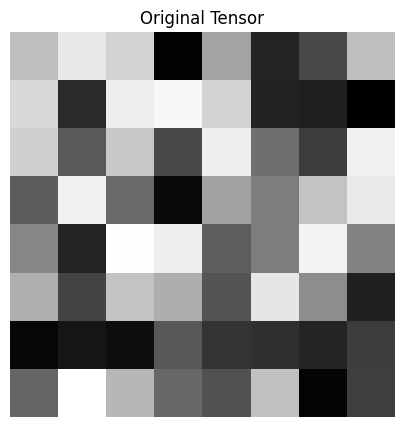

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

XX = torch.rand(size=(8, 8))

print("Original Tensor:\n", XX)
print("Original Size:", XX.shape)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

axs.imshow(XX, cmap='gray')
axs.set_title('Original Tensor')
axs.axis('off')

plt.show()

Reflect Padding Tensor:
 tensor([[0.9087, 0.7466, 0.9087, 0.8305, 0.0171, 0.6441, 0.1480, 0.2851, 0.7510,
         0.2851],
        [0.1730, 0.8484, 0.1730, 0.9319, 0.9652, 0.8219, 0.1411, 0.1296, 0.0068,
         0.1296],
        [0.3581, 0.8125, 0.3581, 0.7833, 0.2872, 0.9305, 0.4410, 0.2444, 0.9410,
         0.2444],
        [0.9417, 0.3678, 0.9417, 0.4195, 0.0455, 0.6367, 0.4954, 0.7643, 0.9118,
         0.7643],
        [0.1462, 0.5310, 0.1462, 0.9949, 0.9351, 0.3730, 0.4932, 0.9559, 0.5176,
         0.9559],
        [0.2745, 0.6877, 0.2745, 0.7656, 0.6829, 0.3328, 0.9009, 0.5575, 0.1342,
         0.5575],
        [0.0938, 0.0357, 0.0938, 0.0647, 0.3473, 0.2083, 0.1898, 0.1483, 0.2437,
         0.1483],
        [0.9999, 0.4011, 0.9999, 0.7190, 0.4084, 0.3277, 0.7588, 0.0238, 0.2529,
         0.0238]])
Reflect Padding Size: torch.Size([8, 10])


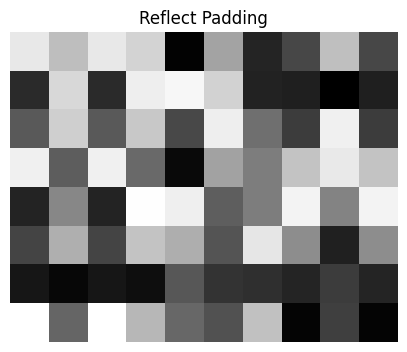

In [ ]:
XX_reflect = F.pad(XX, pad=(1, 1), mode='reflect')

print("Reflect Padding Tensor:\n", XX_reflect)
print("Reflect Padding Size:", XX_reflect.shape)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))


axs.imshow(XX_reflect, cmap='gray')
axs.set_title('Reflect Padding')
axs.axis('off')

plt.show()

Replicate Padding Tensor:
 tensor([[0.7466, 0.7466, 0.9087, 0.8305, 0.0171, 0.6441, 0.1480, 0.2851, 0.7510,
         0.7510],
        [0.8484, 0.8484, 0.1730, 0.9319, 0.9652, 0.8219, 0.1411, 0.1296, 0.0068,
         0.0068],
        [0.8125, 0.8125, 0.3581, 0.7833, 0.2872, 0.9305, 0.4410, 0.2444, 0.9410,
         0.9410],
        [0.3678, 0.3678, 0.9417, 0.4195, 0.0455, 0.6367, 0.4954, 0.7643, 0.9118,
         0.9118],
        [0.5310, 0.5310, 0.1462, 0.9949, 0.9351, 0.3730, 0.4932, 0.9559, 0.5176,
         0.5176],
        [0.6877, 0.6877, 0.2745, 0.7656, 0.6829, 0.3328, 0.9009, 0.5575, 0.1342,
         0.1342],
        [0.0357, 0.0357, 0.0938, 0.0647, 0.3473, 0.2083, 0.1898, 0.1483, 0.2437,
         0.2437],
        [0.4011, 0.4011, 0.9999, 0.7190, 0.4084, 0.3277, 0.7588, 0.0238, 0.2529,
         0.2529]])
Replicate Padding Size: torch.Size([8, 10])


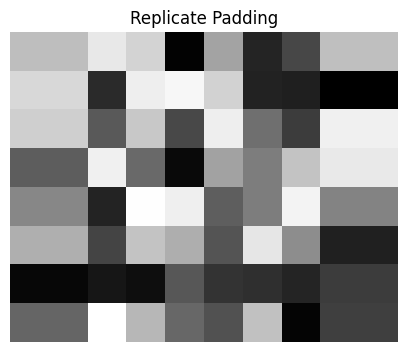

In [ ]:
XX_replicate = F.pad(XX, pad=(1, 1), mode='replicate')
print("Replicate Padding Tensor:\n", XX_replicate)
print("Replicate Padding Size:", XX_replicate.shape)
# 시각적으로 비교하여 확인 (matplotlib 사용)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Replicate Padding 적용된 이미지
axs.imshow(XX_replicate, cmap='gray')
axs.set_title('Replicate Padding')
axs.axis('off')
plt.show()

In [ ]:
print("Original Tensor:\n", XX[0])
print("Reflect Padding Tensor:\n", XX_reflect[0])
print("Replicate Padding Tensor:\n", XX_replicate[0])

Original Tensor:
 tensor([0.7466, 0.9087, 0.8305, 0.0171, 0.6441, 0.1480, 0.2851, 0.7510])
Reflect Padding Tensor:
 tensor([0.9087, 0.7466, 0.9087, 0.8305, 0.0171, 0.6441, 0.1480, 0.2851, 0.7510,
        0.2851])
Replicate Padding Tensor:
 tensor([0.7466, 0.7466, 0.9087, 0.8305, 0.0171, 0.6441, 0.1480, 0.2851, 0.7510,
        0.7510])


##7.4. Multiple Input and Multiple Output Channels

In [ ]:
import torch
from d2l import torch as d2l

###7.4.1. Multiple Input Channels

In [ ]:
def corr2d_multi_in(X, K):
  return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [ ]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

###7.4.2. Multiple Output Channels

In [ ]:
def corr2d_multi_in_out(X, K):
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [ ]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [ ]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

###7.4.3. 1 X 1 Convolutional Layer

In [ ]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [ ]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

### 7.4.4. Execises & Discussion

1. 1 x 1 convolution은 왜 필요한가?
-> 1 x 1 convolution은 우리가 알고 있는 일반적인 커널과는 달리 주변의 조합을 통해 전체적 혹은 국소적인 특징을 파악하는 것은 아님. 다만 하나의 픽셀 내에 있는 채널의 여러 정보를 추합하여 해당 픽셀에 관한 이해도를 높이고 특징을 잘 추출할 수 있는 역할을 함.

2. 그렇다면 Gray Scale에서는 1 x 1 convolution이 무용한가?
-> Gray Scale은 RGB 값을 갖지 않기 때문에 대부분 무용할 때가 많음. 그러나 feature map이 이미 생성된 경우 이를 조합하여 새로운 feature map을 생성하거나, 하나의 채널을 여러 개의 채널로 확장하여 학습을 세분화하거나, 채널이 너무 많은 경우 중요한 채널만 남도록 차원을 줄이는 역할에서 1 x 1 convolution이 활용될 수 있다.

## 7.5. Pooling

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 7.5.1. Maximum Poolig and Average Pooling

In [ ]:
def pool2d(X, pool_size, mode='max'):
  p_h, p_w = pool_size
  Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      if mode == 'max':
        Y[i, j] = X[i: i + p_h, j: j + p_w].max()
      elif mode == 'avg':
        Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
  return Y

In [ ]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [ ]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

###7.5.2. Padding and Stride

In [ ]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [ ]:
pool2d = nn.MaxPool2d((2,3), stride=(2,3), padding=(0,1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

###7.5.3. Multiple Channels

In [ ]:
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

###7.5.4. Exercises & Discussion

1. Why do you expect max-pooling and average pooling to work differently?
-> max-pooling은 feature map의 중요한 정보를 중점적으로 남긴다면, average-pooling은 전체적인 특징을 모두 반영하려 하는 pooling 방식이기 때문이다.

2. layer마다 다른 pooling 방식을 적용하면 어떨까?
-> 초기 layer는 주로 국소적인 부분에 집중하여서 특징을 학습하는 경향이 있다. 이 부분에 max-pooling을 적용하면 국소적인 부분을 탐색하는 데 있어 중요한 정보를 잘 뽑아낼 수 있을 것이라고 생각된다. 후기 layer는 주로 전체적인 특징을 학습하기에 이 부분에 average-pooling을 사용한다면 전반적으로 generalizability가 올라갈 수 있지 않을까라고 사려된다.

-> 의료 영상 혹은 위성 이미지와 같은 노이즈가 많은 데이터에서는 초기 layer에서 average-pooling을 사용해 노이즈를 줄이고, 후기 Layer에서 max-pooling으로 중요한 특징을 추출하는 것이 좋을 수 있다.

3. smoothing이 왜 필요할까? 강한 특성 탐지가 더 좋은 건 아닐까?

-> 강력한 특징만을 뽑으면 세부적인 특성이 무시될 수 있음. 또한, 국소적인 부분에 집중되어 일관적인 패턴 학습이 어려울 수 있음.

## 7.6. Convolutional Neural Networks (LeNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

###7.6.1. LeNet

In [ ]:
def init_cnn(module):
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
    nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.Sigmoid(),
        nn.LazyLinear(84), nn.Sigmoid(),
        nn.LazyLinear(num_classes))

In [ ]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
  X = torch.randn(*X_shape)
  for layer in self.net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


###7.6.2. Training

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)

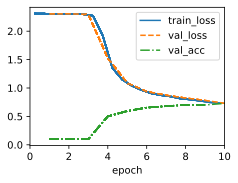

In [ ]:
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

### 7.6.3. Exercises & Discussion

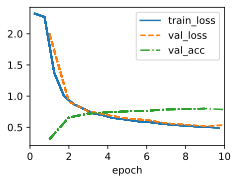

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.3)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [ ]:
def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet2(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
  X = torch.randn(*X_shape)
  for layer in self.net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

model2 = LeNet2()
model2.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


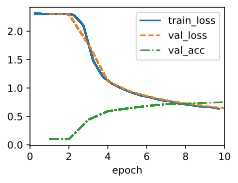

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model2 = LeNet2(lr=0.1)
model2.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model2, data)

In [ ]:
def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet3(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

In [ ]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
  X = torch.randn(*X_shape)
  for layer in self.net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

model3 = LeNet3()
model3.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


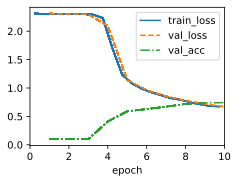

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model3 = LeNet2(lr=0.1)
model3.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model3, data)